# Notebook to analyse E-REMD data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

## Define readin of distances, kappa, and dipoles

In [4]:
data_path = 'preprocessed_data/'

def concatenate_distances(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],reps=[],core=''):
    id = linker
    L_diss = []
    
    for rep in reps:
        for i in random_states:
            for s in chunks:
                L_dis = np.load(data_path + '/%s%i_r%i_q1_rep%i_%i_dis.npy' % (core,id,i,rep,s))
                L_dis = L_dis[rep_indices]

                # For the first chunk remove 20 ns equilibration
                if s == 0:
                    L_dis = L_dis[10000:]
                L_diss.append(L_dis)

    L_diss = np.concatenate(L_diss)
    return L_diss

def concatenate_kappa(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],reps=[],core=''):
    id = linker
    L_kappas = []
    
    for rep in reps:
        for i in random_states:
            for s in chunks:
                L_kappa = np.load(data_path + '/%s%i_r%i_q1_rep%i_%i_kappa.npy' % (core,id,i,rep,s))
                L_kappa = L_kappa[rep_indices]

                # For the first chunk remove 20 ns equilibration
                if s == 0:
                    L_kappa = L_kappa[10000:]
                L_kappas.append(L_kappa)

    L_kappas = np.concatenate(L_kappas)
    return L_kappas

def concatenate_dipoles(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],reps=[],core=''):
    id = linker
    L_dipoles = []
    
    for rep in reps:
        for i in random_states:
            for s in chunks:
                L_dipole = np.load(data_path + '/%s%i_r%i_q1_rep%i_%i_dipole.npy' % (core,id,i,rep,s))
                L_dipole = L_dipole[rep_indices]

                # For the first chunk remove 20 ns equilibration
                if s == 0:
                    L_dipole = L_dipole[10000:]
                L_dipoles.append(L_dipole)

    L_dipoles = np.concatenate(L_dipoles)

    # Dipoles were calculated without unit conversion, to be in line with the QM Classical calculations convert here
    alpha_factor = 0.148 * 3.1 / 0.529 / 100 # alpha 3.1 into Angstrom**3; Angstrom**1 into atomic radii; from nm into Angstrom
    L_dipoles = L_dipoles * alpha_factor


    return L_dipoles

## Read in data for specific Replica

In [5]:
# All simulations start at the same point indicated by random =0
random = [0]

# The simulation consists of 5 chunks of 100ns each
chunks = [0,1,2,3,4]

# There are 10 repetitions with different starting velocities
reps = [i for i in range(10)]

# 16 replicas are simulated
replicas = 16

# Each replica is simulated for 20ps (10000 steps) with a write out frequency of a 1000, each replica consists of 10 frames in a row
per_rep = 10

# Each replica is simulated for 100ns at 10frames per it that gives 5000 blocks 
step_range = 5000

# Which replica to look at 
replica = 12

# Calculates indices for each replica -> chunks of 10 frames every 16 repeats
rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]

# The data is preprocessed and divided in the 3 important contributions distances, kappas and dipoles
dis0 = concatenate_distances(0,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
kappa0 = concatenate_kappa(0,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dipole0 = concatenate_dipoles(0,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dis1 = concatenate_distances(1,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
kappa1 = concatenate_kappa(1,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dipole1 = concatenate_dipoles(1,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dis2 = concatenate_distances(2,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
kappa2 = concatenate_kappa(2,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dipole2 = concatenate_dipoles(2,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dis3 = concatenate_distances(3,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
kappa3 = concatenate_kappa(3,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
dipole3 = concatenate_dipoles(3,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')

#### Setup dictionary

In [6]:
dis_dict = {'l2':dis0,'l6':dis1,'l9':dis2,'l13':dis3}
kappa_dict = {'l2':kappa0,'l6':kappa1,'l9':kappa2,'l13':kappa3}
dipole_dict = {'l2':dipole0,'l6':dipole1,'l9':dipole2,'l13':dipole3}

linker_dic = {'l2':'L2','l6':'L6','l9':'L9','l13':'L13'}
linker_colors = {'l2':'Blues','l6':'Oranges','l9':'Greens','l13':'Reds'}

#### Plot distance distributions

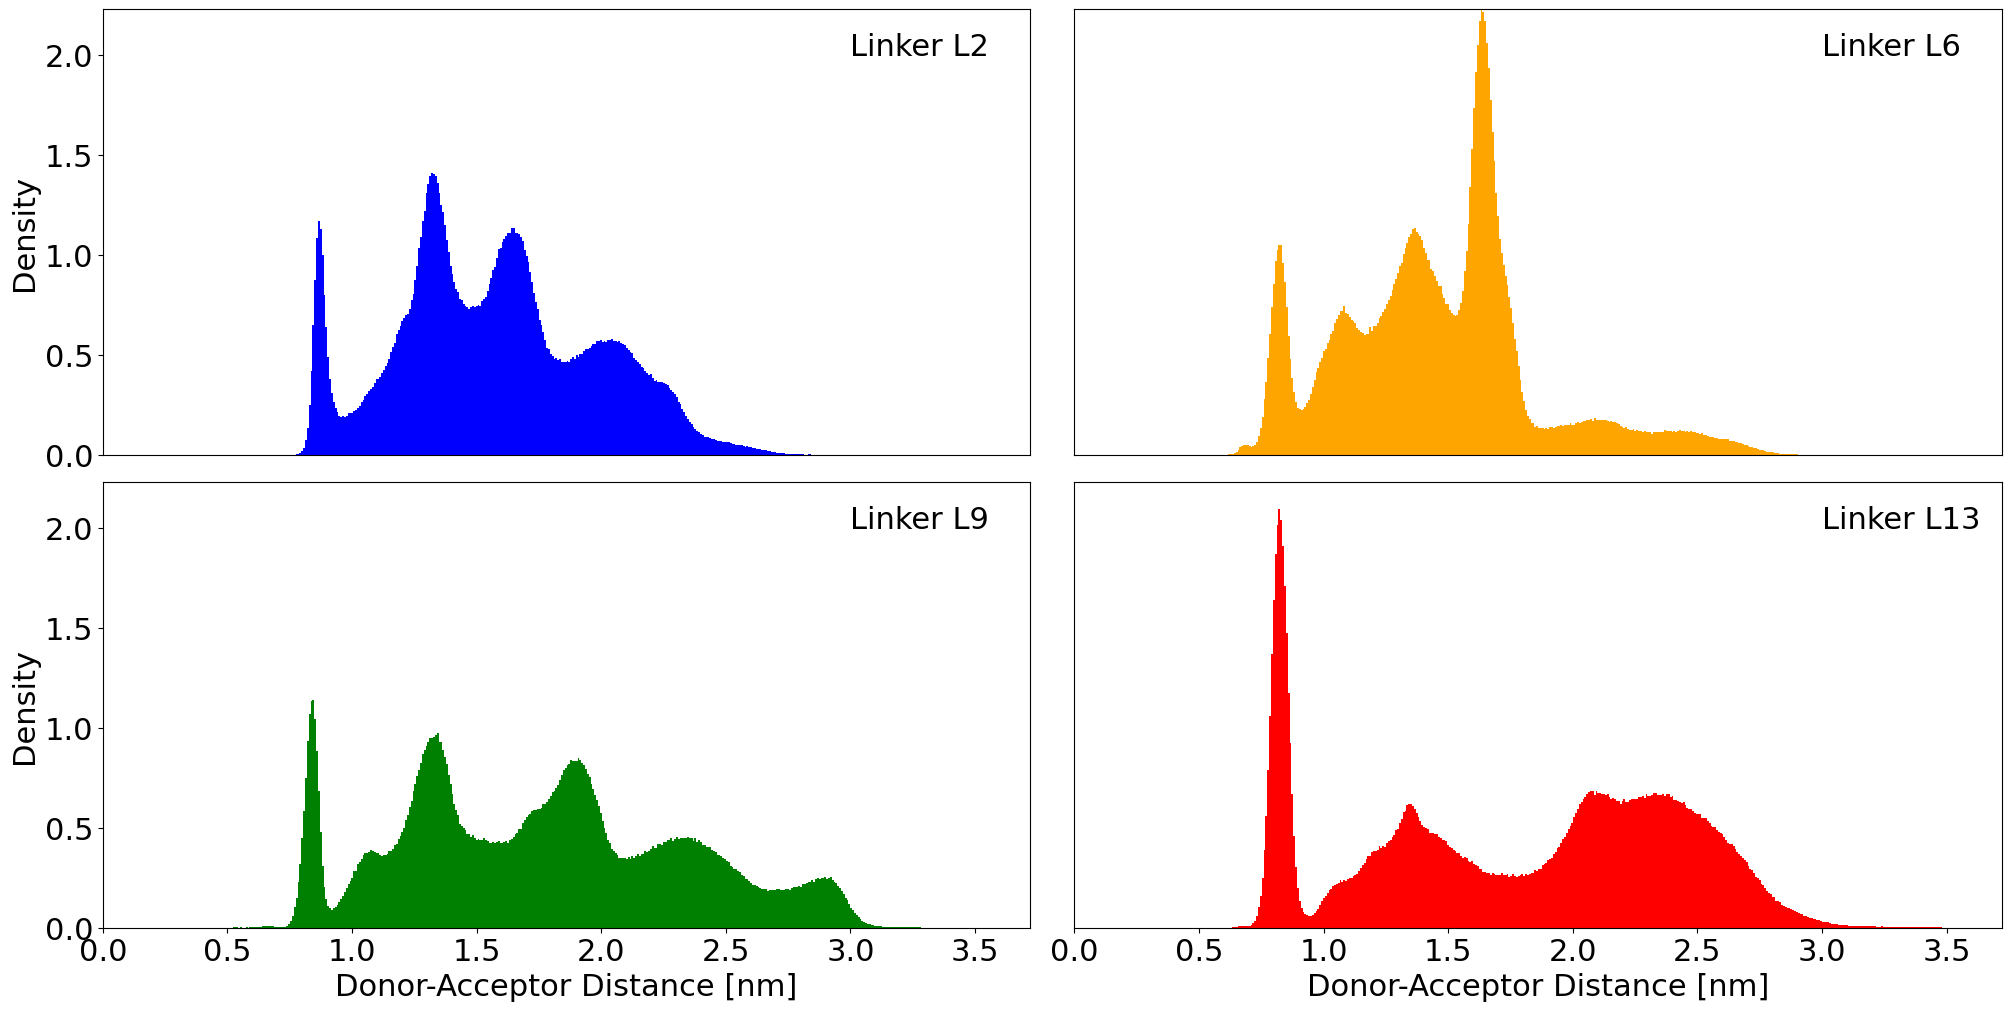

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["l2", "l6"],
        ["l9", "l13"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
for l in axd.keys():
    m = np.max(dis_dict[l])
    ms.append(m)
m = np.max(ms)

histms = []
for l in axd.keys():

    hist_ob = axd[l].hist(np.array(dis_dict[l]),bins=500,color=linker_colors[l].split('s')[0],density=True,alpha=1,range=[0,m])
    histms.append(np.max(hist_ob[0]))
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Density')
    axd[l].text(3,2,'Linker %s' % linker_dic[l])

hm = np.max(histms)
for l in axd.keys():
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,hm])

axd['l6'].get_xaxis().set_visible(False)
axd['l6'].get_yaxis().set_visible(False)
axd['l2'].get_xaxis().set_visible(False)
axd['l13'].get_yaxis().set_visible(False)

In [8]:
np.mean(dis_dict['l2']),np.mean(dis_dict['l6']),np.mean(dis_dict['l9']),np.mean(dis_dict['l13'])

(1.5703547421285406, 1.4584582230652077, 1.7578186622143008, 1.777344867847764)

### Plot dipole distribution

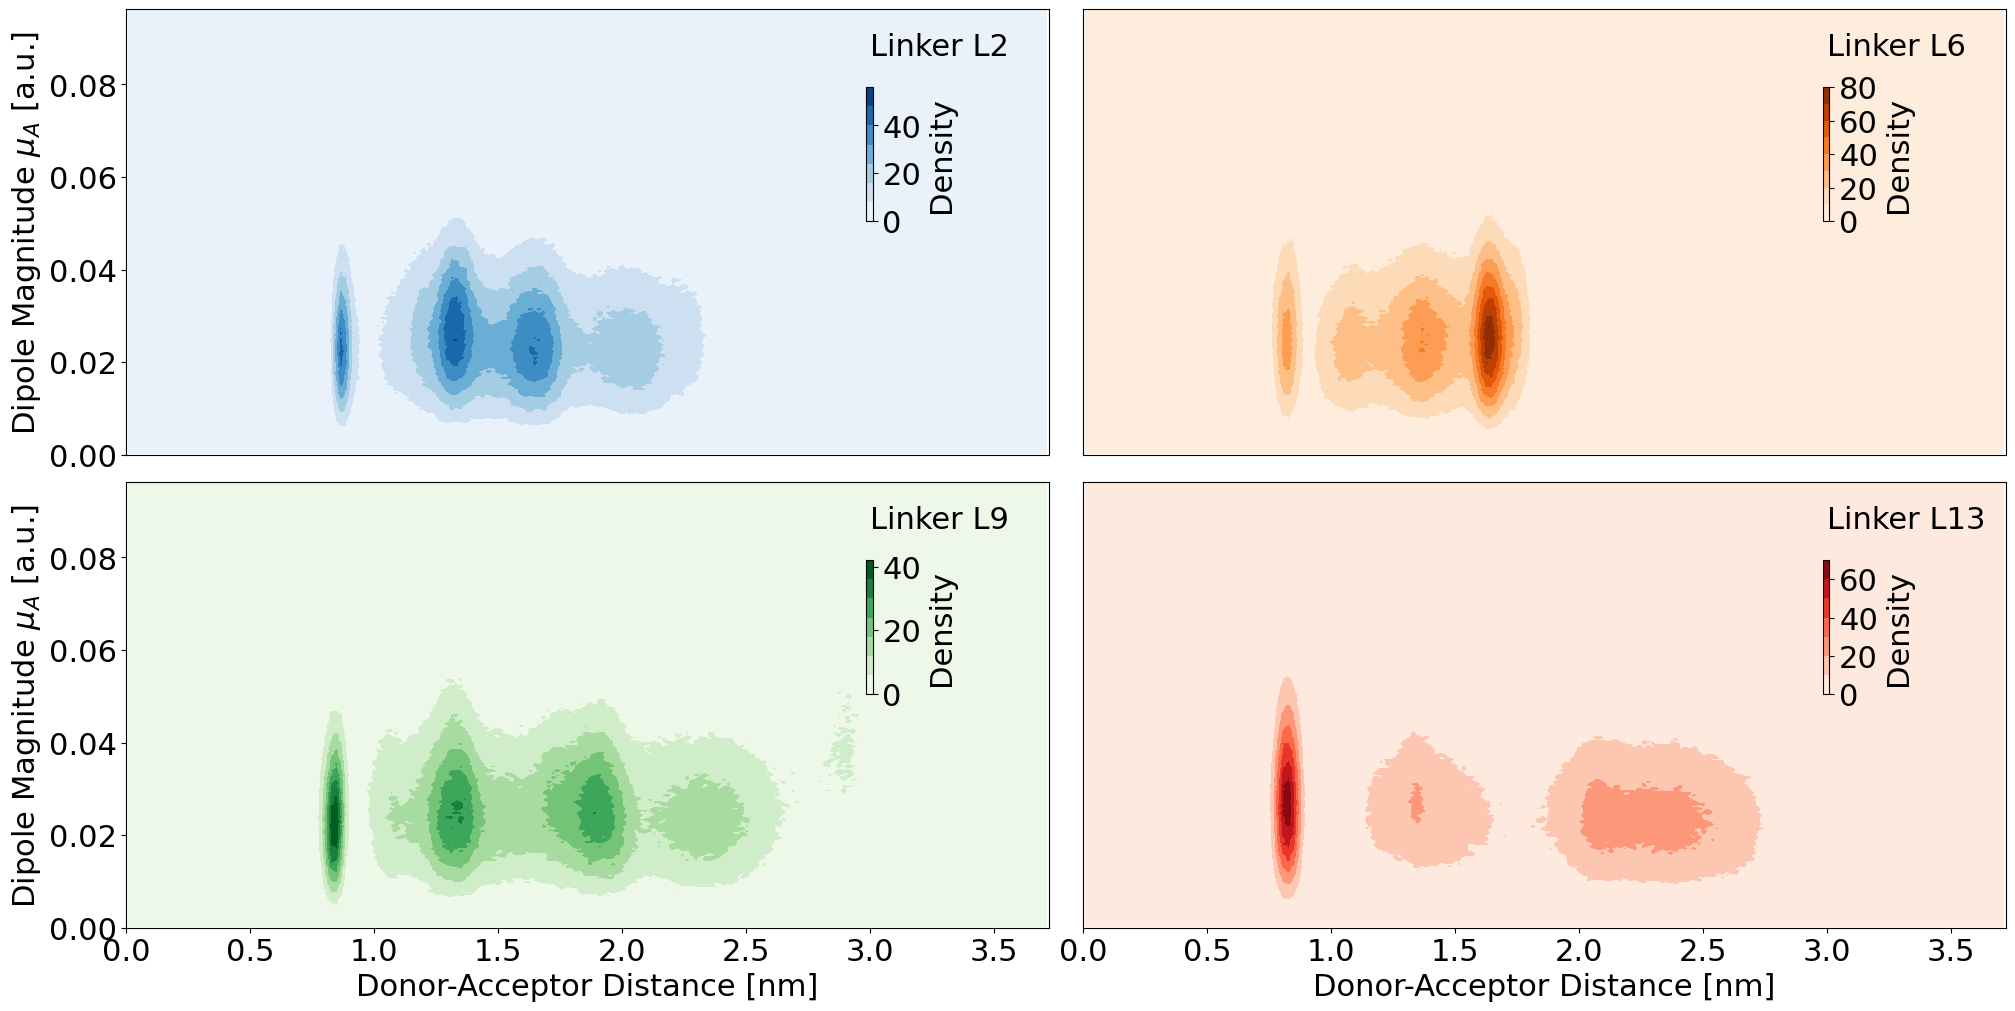

In [9]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["l2", "l6"],
        ["l9", "l13"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
ds = []
for l in axd.keys():
    d = np.max(dipole_dict[l])
    m = np.max(dis_dict[l])
    ms.append(m)
    ds.append(d)
m = np.max(ms)
d = np.max(ds)


for l in axd.keys():
    z, xedge, yedge = np.histogram2d(np.array(dis_dict[l]), np.linalg.norm(dipole_dict[l],axis=1),density=True,bins=200,range=[[0,m],[0,d]])
    x = 0.5 * (xedge[:-1] + xedge[1:])
    y = 0.5 * (yedge[:-1] + yedge[1:])
    z = z.T

    object = axd[l].contourf(x,y,z,cmap=linker_colors[l])
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,d])
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Dipole Magnitude $\mu_A$ [a.u.]')
    axd[l].text(3,d-1/100,'Linker %s' % linker_dic[l])
    
    plt.colorbar(object,ax=[axd[l]],label=r'Density',orientation='vertical',shrink=0.3,anchor=(0.1,0.75),location='right',pad=-0.2,ticks = np.array([0,0.2,0.4,0.6,0.8,1])*100)

axd['l6'].get_xaxis().set_visible(False)
axd['l6'].get_yaxis().set_visible(False)
axd['l2'].get_xaxis().set_visible(False)
axd['l13'].get_yaxis().set_visible(False)
plt.savefig('Visualisations/dipole.pdf')

#### Calculate averages for mean of the squared dipole

In [10]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.mean((np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<1]))
    long_distances.append(np.mean((np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,4,4))
for i in range(4):
    for j in range(4):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]

#### Relative table below

In [11]:
rel_dis_matrics

array([[[1.        , 0.8810222 , 0.95216332, 0.78759685],
        [1.13504518, 1.        , 1.08074838, 0.89395801],
        [1.05024   , 0.92528476, 1.        , 0.82716572],
        [1.26968512, 1.11862078, 1.20894759, 1.        ]],

       [[1.        , 0.96153383, 0.88462678, 0.96297703],
        [1.04000501, 1.        , 0.92001629, 1.00150094],
        [1.13042022, 1.08693728, 1.        , 1.08856871],
        [1.03844636, 0.99850131, 0.91863746, 1.        ]]])

In [12]:
np.mean((np.linalg.norm(dipole_dict['l13'],axis=1)**2)[dis_dict['l13']<1]) / np.mean((np.linalg.norm(dipole_dict['l2'],axis=1)**2)[dis_dict['l2']<1])

1.2696851177704302

#### Plot Kappa distribution

/tmp/ipykernel_168188/2200180381.py:28: UserWarning: Log scale: values of z <= 0 have been masked
  object = axd[l].contourf(x,y,z,cmap=linker_colors[l],locator=ticker.LogLocator(2,numticks=10))


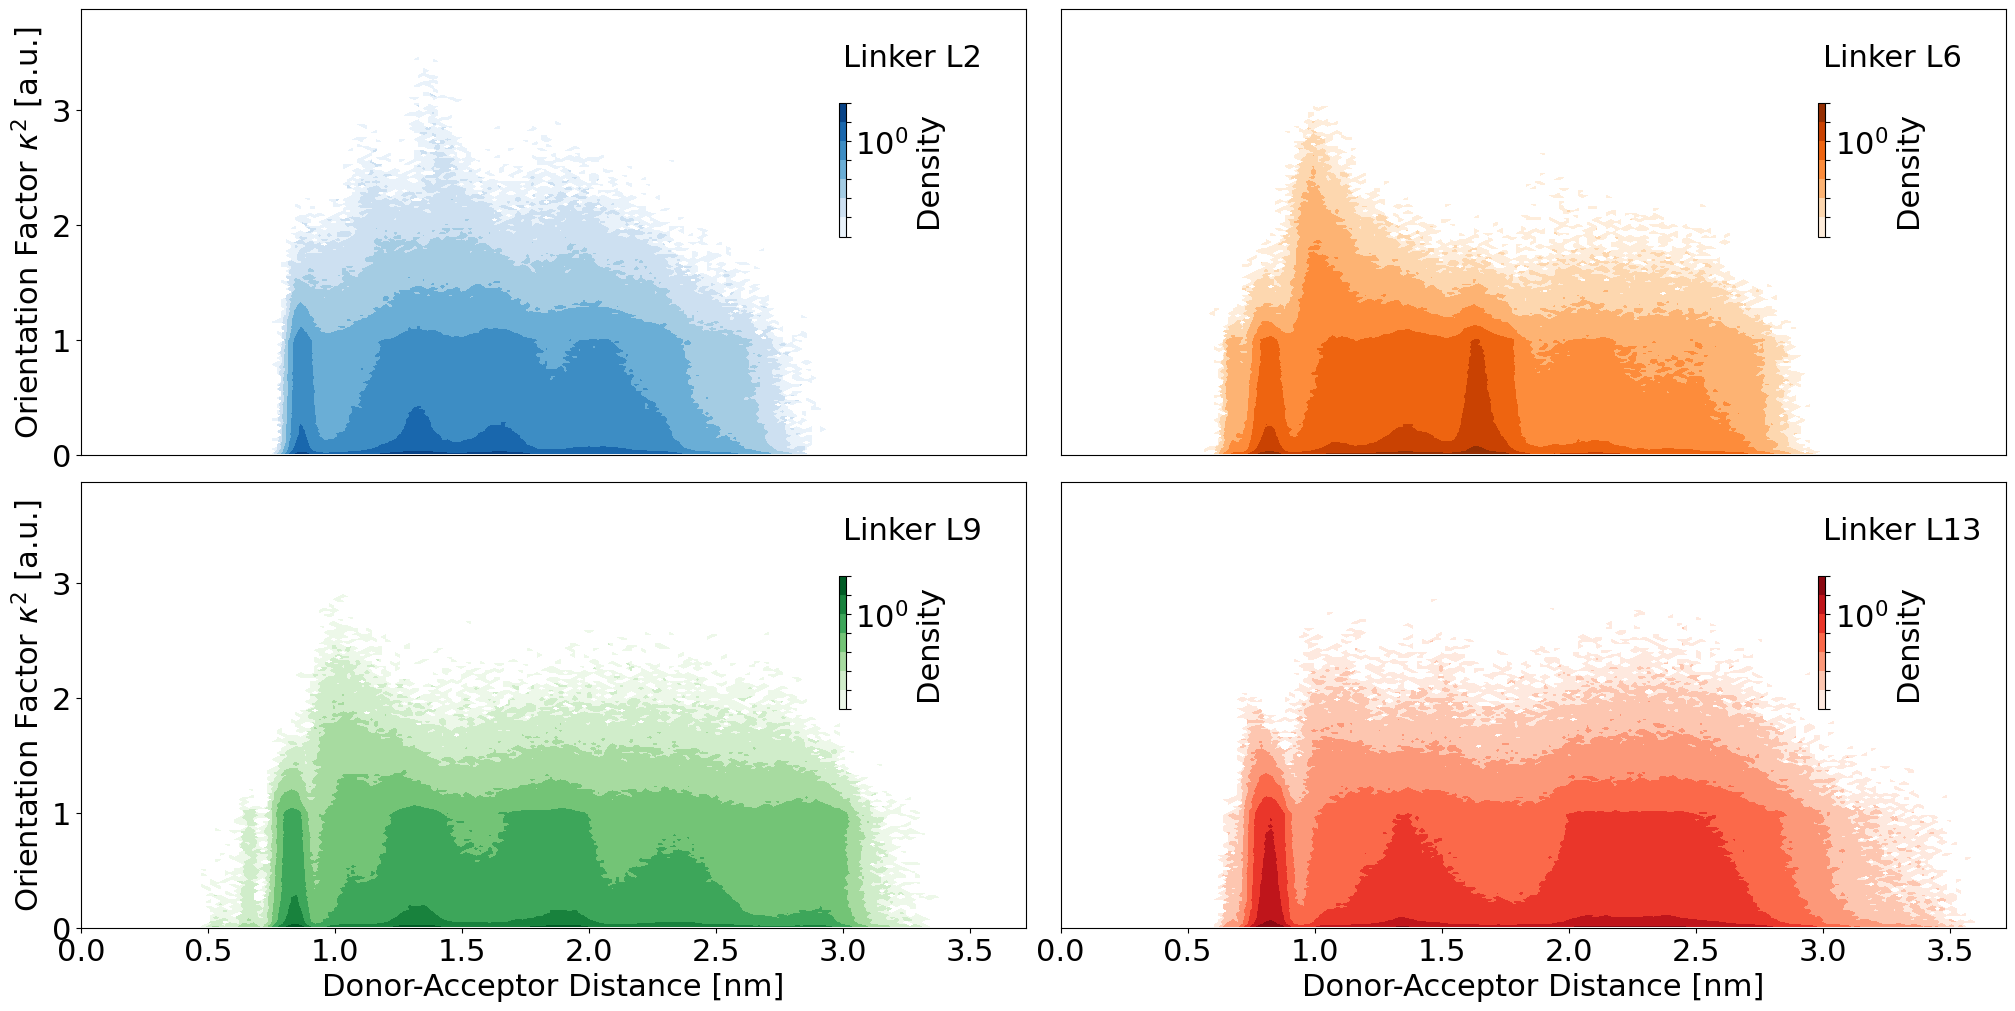

In [13]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["l2", "l6"],
        ["l9", "l13"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
ks = []
for l in axd.keys():
    k = np.nanmax(kappa_dict[l])
    m = np.nanmax(dis_dict[l])
    ms.append(m)
    ks.append(k)
m = np.max(ms)
k = np.max(ks)

for l in axd.keys():

    z, xedge, yedge = np.histogram2d(np.array(dis_dict[l]), kappa_dict[l],density=True,bins=200,range=[[0,m],[0,k]])
    x = 0.5 * (xedge[:-1] + xedge[1:])
    y = 0.5 * (yedge[:-1] + yedge[1:])
    z = z.T

    object = axd[l].contourf(x,y,z,cmap=linker_colors[l],locator=ticker.LogLocator(2,numticks=10))
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,k])
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Orientation Factor $\kappa^2$ [a.u.]')
    axd[l].text(3,k-0.5,'Linker %s' % linker_dic[l])
    
    plt.colorbar(object,ax=[axd[l]],label=r'Density',orientation='vertical',shrink=0.3,anchor=(0.1,0.7),location='right',pad=-0.2)

axd['l6'].get_xaxis().set_visible(False)
axd['l6'].get_yaxis().set_visible(False)
axd['l2'].get_xaxis().set_visible(False)
axd['l13'].get_yaxis().set_visible(False)
plt.savefig('Visualisations/kappa.pdf')

#### Relative table below

In [14]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<1]))
    long_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,4,4))
for i in range(4):
    for j in range(4):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]
rel_dis_matrics

array([[[1.        , 1.08283435, 1.1127503 , 1.10097391],
        [0.92350229, 1.        , 1.02762745, 1.01675193],
        [0.89867421, 0.9731153 , 1.        , 0.98941686],
        [0.90828673, 0.98352407, 1.01069634, 1.        ]],

       [[1.        , 1.04362819, 1.01671628, 1.02186741],
        [0.95819566, 1.        , 0.97421312, 0.97914892],
        [0.98355856, 1.02646944, 1.        , 1.00506644],
        [0.97860054, 1.02129511, 0.9949591 , 1.        ]]])

##### Net effect

In [15]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<1]*(np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<1]))
    long_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<10]*(np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,4,4))
for i in range(4):
    for j in range(4):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]
rel_dis_matrics

array([[[1.        , 1.08596808, 1.06402706, 0.90398413],
        [0.92083738, 1.        , 0.97979589, 0.83242238],
        [0.93982572, 1.02062073, 1.        , 0.84958753],
        [1.10621411, 1.20131321, 1.17704175, 1.        ]],

       [[1.        , 1.01155937, 0.8732534 , 0.98264135],
        [0.98857272, 1.        , 0.86327449, 0.97141243],
        [1.14514298, 1.15838011, 1.        , 1.12526484],
        [1.0176653 , 1.02942887, 0.88867968, 1.        ]]])

### Show development over different replicas

In [35]:
# plt.rcParams["figure.figsize"] = (10,30)
# plt.rcParams.update({'font.size': 22})
# axd = plt.figure(constrained_layout=True).subplot_mosaic(
#     [
#         ["l2"],["l6"],
#         ["l9"],["l13"],
#     ],
#     empty_sentinel="BLANK"
# )

# from matplotlib.pyplot import cm
# colorb = iter(cm.Blues(np.linspace(0, 1, 16)))
# coloro = iter(cm.Oranges(np.linspace(0, 1, 16)))
# colorg = iter(cm.Greens(np.linspace(0, 1, 16)))
# colorr = iter(cm.Reds(np.linspace(0, 1, 16)))

# linker_colors = {'l2':colorb,'l6':coloro,'l9':colorg,'l13':colorr}

# histms = []
# dism = []

# for replica in range(16):

#     # recalculate indices based on replica
#     rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]

#     # get distances
#     dis0 = concatenate_distances(0,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
#     dis1 = concatenate_distances(1,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
#     dis2 = concatenate_distances(2,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
#     dis3 = concatenate_distances(3,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
    
#     dis_dict = {'l2':dis0,'l6':dis1,'l9':dis2,'l13':dis3}

#     for l in axd.keys():
#         c = next(linker_colors[l])
#         # alternative labeling
#         #  if not replica % 2:
#         if True:
#             hist = axd[l].hist(np.array(dis_dict[l]),bins=500,color=c,density=True,alpha=1,label='%.2f' % np.sqrt(1-replica/20))
#         else:
#             hist = axd[l].hist(np.array(dis_dict[l]),bins=500,color=c,density=True,alpha=1)
#         histms.append(np.max(hist[0]))
#         dism.append(np.max(dis_dict[l]))
        
# for l in axd.keys():
#     axd[l].set_xlim([0,np.max(dism)])
#     axd[l].set_ylim([0,np.max(histms)])
#     axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
#     axd[l].set_ylabel('Density')
#     axd[l].text(0.1,5,'Linker %s' % linker_dic[l])
#     axd[l].legend(title = 'Scaling',loc= 'upper right', prop={'size': 18})


# plt.savefig('Visualisations/distdevelopvh.png')
# plt.savefig('Visualisations/distdevelopvh.pdf')

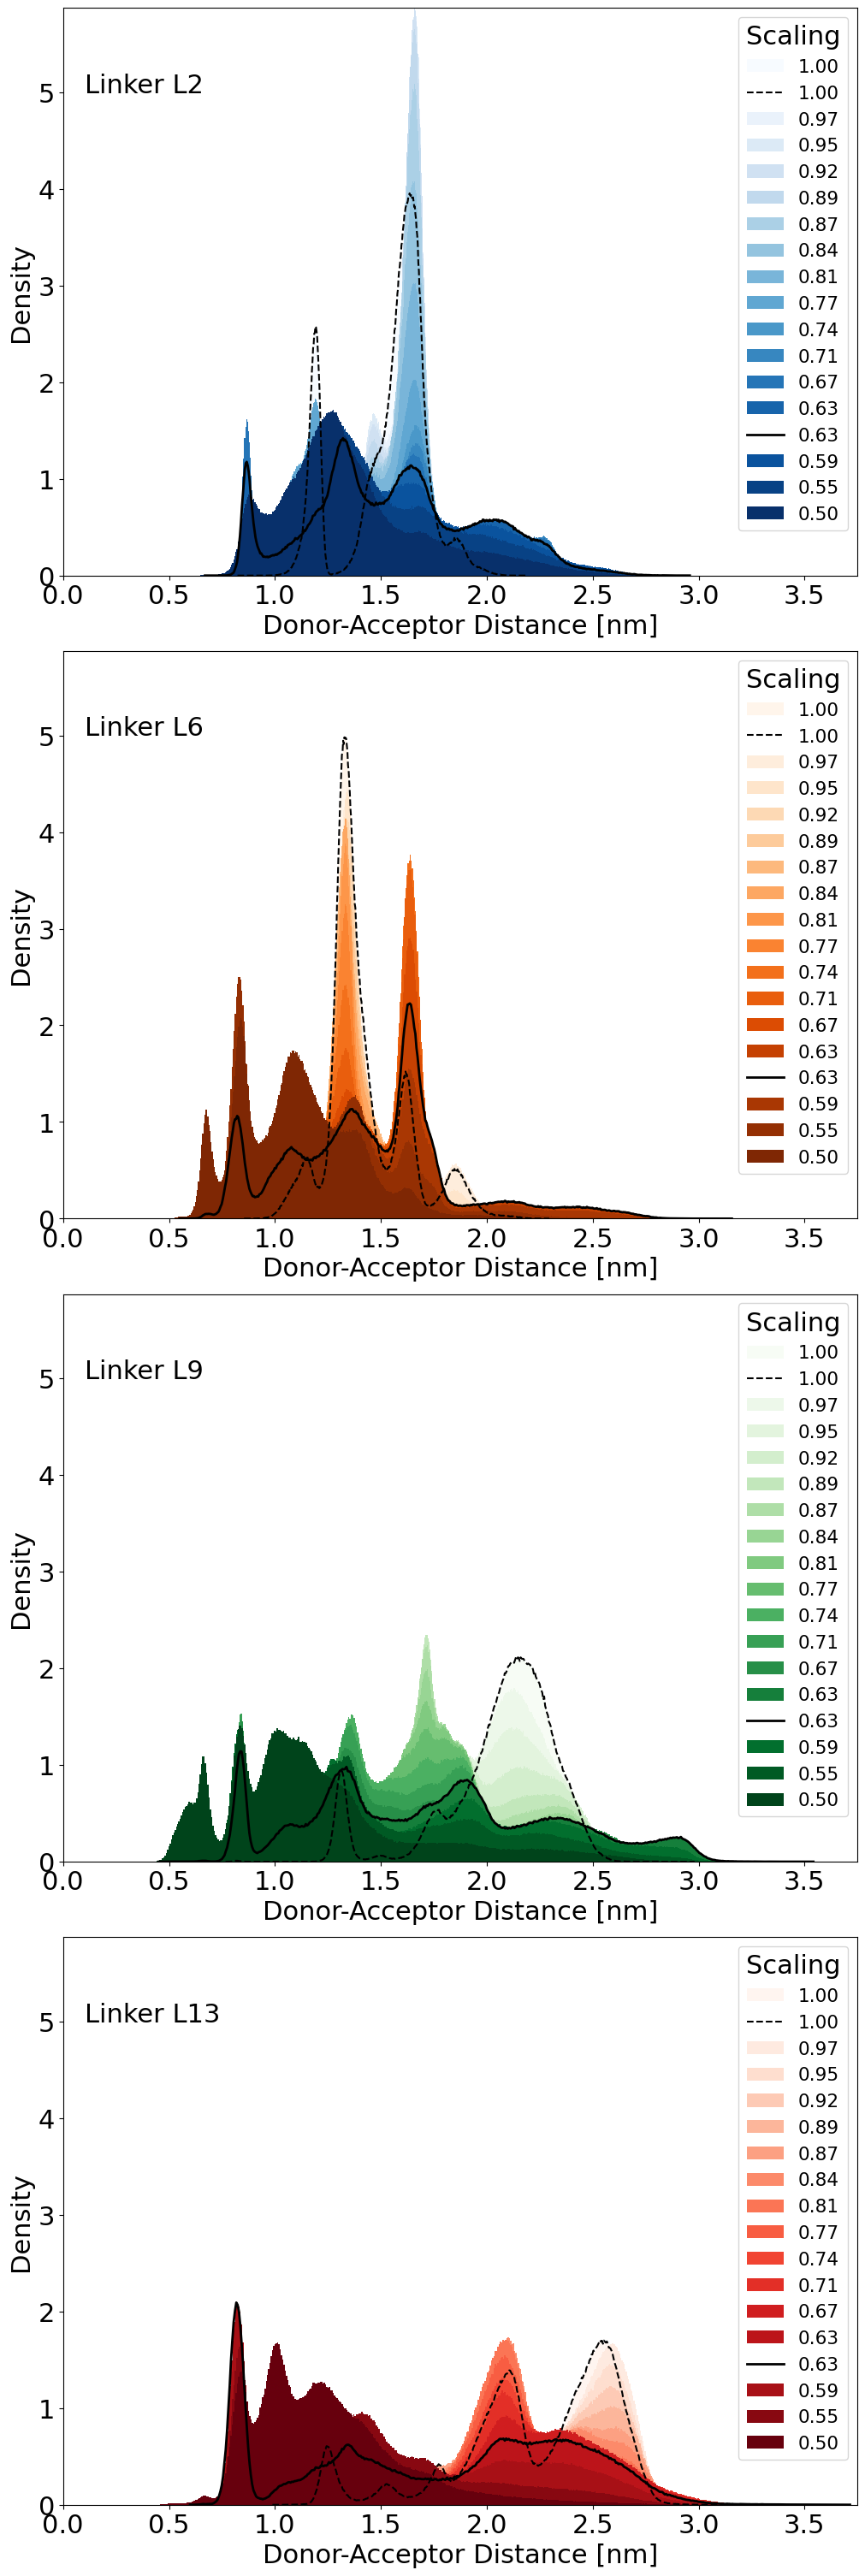

In [34]:
plt.rcParams["figure.figsize"] = (10,30)
plt.rcParams.update({'font.size': 22})
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["l2"],["l6"],
        ["l9"],["l13"],
    ],
    empty_sentinel="BLANK"
)

from matplotlib.pyplot import cm
colorb = iter(cm.Blues(np.linspace(0, 1, 16)))
coloro = iter(cm.Oranges(np.linspace(0, 1, 16)))
colorg = iter(cm.Greens(np.linspace(0, 1, 16)))
colorr = iter(cm.Reds(np.linspace(0, 1, 16)))

linker_colors = {'l2':colorb,'l6':coloro,'l9':colorg,'l13':colorr}

histms = []
dism = []

for replica in range(16):

    # recalculate indices based on replica
    rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]

    # get distances
    dis0 = concatenate_distances(0,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
    dis1 = concatenate_distances(1,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
    dis2 = concatenate_distances(2,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
    dis3 = concatenate_distances(3,random,chunks,rep_indices,reps=reps,core='plus100ns_start_water_300K_1to025_id')
    
    dis_dict = {'l2':dis0,'l6':dis1,'l9':dis2,'l13':dis3}

    for l in axd.keys():
        c = next(linker_colors[l])
        # alternative labeling
        #  if not replica % 2:
        if True:
            hist = axd[l].hist(np.array(dis_dict[l]),bins=500,color=c,density=True,alpha=1,label='%.2f' % np.sqrt(1-replica/20))
        else:
            hist = axd[l].hist(np.array(dis_dict[l]),bins=500,color=c,density=True,alpha=1)
        histms.append(np.max(hist[0]))
        dism.append(np.max(dis_dict[l]))

        if replica == 0:
            X = [hist[1][i] + (hist[1][i] - hist[1][i])/2 for i in range(500)]
            axd[l].plot(X,hist[0],c='black',linestyle='dashed',label = '1.00')
        if replica == 12:
            X = [hist[1][i] + (hist[1][i] - hist[1][i])/2 for i in range(500)]
            axd[l].plot(X,hist[0],c='black',linewidth=2,label = '0.63')
        
for l in axd.keys():
    axd[l].set_xlim([0,np.max(dism)])
    axd[l].set_ylim([0,np.max(histms)])
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Density')
    axd[l].text(0.1,5,'Linker %s' % linker_dic[l])
    axd[l].legend(title = 'Scaling',loc= 'upper right', prop={'size': 15.5})

plt.savefig('Visualisations/distdevelopvh.png')
plt.savefig('Visualisations/distdevelopvh.pdf')

## Calculate the predicted Efficiencies

In [15]:
# Efficiencies are calculated assuming fast interconversions

def calculate_ef(dis,kappa,dipole,r0):
    
    dipole = dipole / (0.148 * 3.1 / 0.529 / 100)
    
    # note kappa is allready squared in order to calculated efficiently.
    fast_single = (kappa*np.linalg.norm(dipole,axis=1)**2*r0**6) / (dis**6)
    fast_avg = np.nanmean(fast_single)
    ef = 1 / (1 + 1/fast_avg)

    return ef

#### Calculated the efficiencies

In [16]:
efficiencies = np.empty((16,4,10))
efficiencies[:] = np.nan

# assume a r'0 of 0.7
ro_base = 0.7

# Average over the different random seeds
for replica in range(16):
    for id in range(4):
        for ra,random in enumerate([[0]]):
            for re,rep in enumerate([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]):
                rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]
                dis = concatenate_distances(id,random,chunks,rep_indices,reps=rep,core='plus100ns_start_water_300K_1to025_id')
                kappa = concatenate_kappa(id,random,chunks,rep_indices,reps=rep,core='plus100ns_start_water_300K_1to025_id')
                dipole = concatenate_dipoles(id,random,chunks,rep_indices,reps=rep,core='plus100ns_start_water_300K_1to025_id')
                efficiencies[replica,id,ra*3+re] = calculate_ef(dis,kappa,dipole,ro_base)

### print predicted efficiencies

In [17]:
np.mean(efficiencies[12],axis=1),np.std(efficiencies[12],axis=1)

(array([0.13616712, 0.20566197, 0.15548215, 0.27166259]),
 array([0.06209425, 0.08106233, 0.08251956, 0.10543822]))

### Show development of predicted Efficiencies

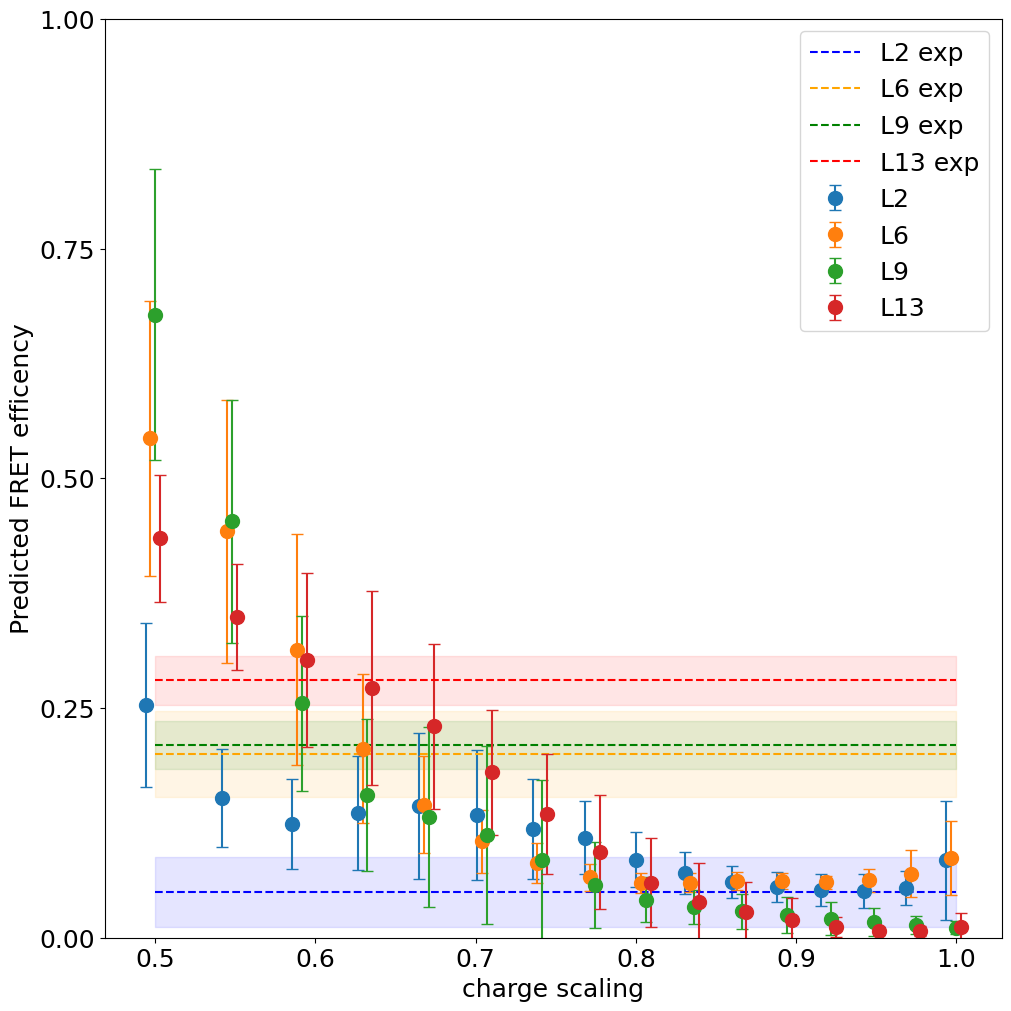

In [18]:
from cProfile import label
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 18})
refs = ((0.05,0.038),(0.2,0.047),(0.21,0.026),(0.28,0.027))
colors = ['blue','orange','green','red']

labels = ['L2','L6','L9','L13']
axd = plt.figure(constrained_layout=True).subplot_mosaic(
        [
            ["comp"]
        ],
        empty_sentinel="BLANK",
        gridspec_kw={"width_ratios": [1],"height_ratios":[1]}
    )
shift = 0.006

xs = np.sqrt(1-np.arange(16)/20) - shift
ran = 0
for i in range(4):
    #axd['comp'].scatter(xs +(shift/2)*i,efficiencies[:,i,ran])
    axd['comp'].errorbar(xs +(shift/2)*i,np.nanmean(efficiencies[:,i,:],axis=1),yerr=np.nanstd(efficiencies[:,i,:],axis=1),fmt='o',capsize=4,label = labels[i],markersize=10)
    axd['comp'].locator_params(nbins=4)
    ref = refs[i]
    axd['comp'].hlines(y=ref[0],xmin=0.5,xmax=1,linestyles='dashed',label='%s exp' % labels[i],color=colors[i])
    axd['comp'].fill_between(x=[0.5,1],y1=ref[0]-ref[1],y2=ref[0]+ref[1], alpha=0.1,color=colors[i])

#axd['comp'].set_ylim([0,0.4])
axd['comp'].set_xlabel('charge scaling')
axd['comp'].set_ylabel('Predicted FRET efficency')
axd['comp'].set_xticks(ticks=[0.5,0.6,0.7,0.8,0.9,1])
axd['comp'].legend()
axd['comp'].set_ylim([0,1])
plt.savefig('Visualisations/predeff.pdf')

## For $\lambda$=0.63

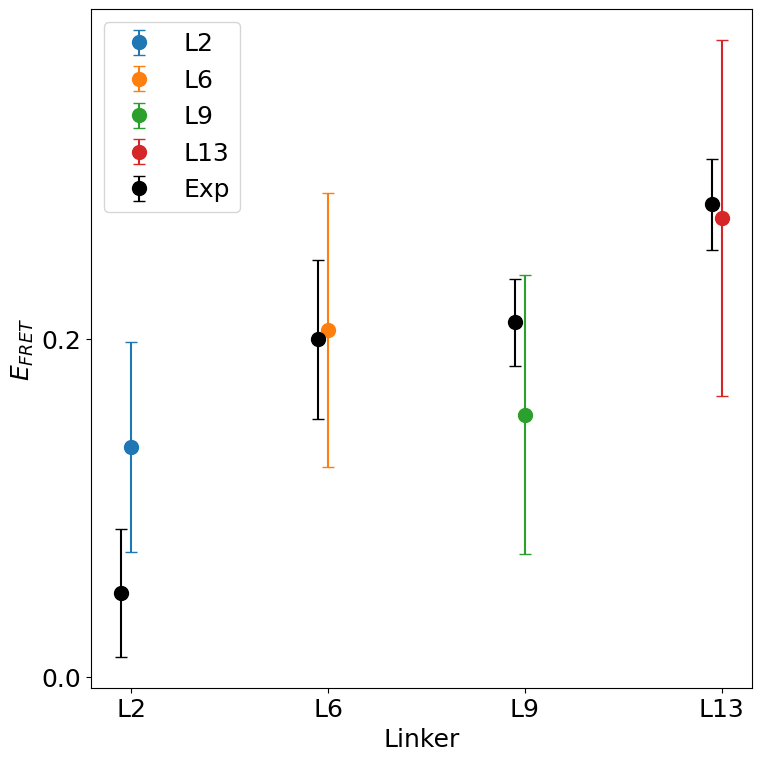

In [19]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
labels = ['L2','L6','L9','L13']
axd = plt.figure(constrained_layout=True).subplot_mosaic(
        [
            ["comp"]
        ],
        empty_sentinel="BLANK",
        gridspec_kw={"width_ratios": [1],"height_ratios":[1]}
    )
shift = 0.006

xs = np.sqrt(1-np.arange(16)/20) - shift
ran = 0
for i in range(4):
    axd['comp'].errorbar(1*i,np.nanmean(efficiencies[12,i,:]),yerr=np.nanstd(efficiencies[12,i,:]),fmt='o',capsize=4,label = labels[i],markersize=10)
    axd['comp'].locator_params(nbins=4)

for i in range(3):
    ref = refs[i]
    axd['comp'].errorbar(1*i-0.05,ref[0],yerr=ref[1],fmt='o',capsize=4,markersize=10,c='black')
i =3
ref = refs[i]
axd['comp'].errorbar(1*i-0.05,ref[0],yerr=ref[1],fmt='o',capsize=4,markersize=10,c='black',label='Exp')

#axd['comp'].set_ylim([0,0.4])
axd['comp'].set_xlabel('Linker')
axd['comp'].set_ylabel('$E_{FRET}$')
axd['comp'].set_xticks(ticks=[0,1,2,3])
axd['comp'].set_xticklabels(['L2','L6','L9','L13'])
axd['comp'].legend()
plt.savefig('Visualisations/prevsexpEFRET.pdf')
plt.savefig('Visualisations/prevsexpEFRET.png')